In [63]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [64]:
df = pd.read_csv(r'C:\Users\Niloy\Dataset\cluster.csv')
df

,Transactions,User,Fruits,Meat,Veg
0,T1,U1>U3,mango,beef,onion
1,T2,U2>U1,litchi,chicken,mushroom
2,T3,U4>U5,orange,lamb,cabbage
3,T4,U2>U4,apple,duck,pumpkin
4,T5,U5>U6,jackfruit,pork,tomato
...,...,...,...,...,...
94,T11,U5>U10,jackfruit,pork,tomato
95,T12,U6>U7,watermalon,turkey,garlic
96,T13,U7>U6,guava,venison,ginger
97,T14,U2>U13,cherry,mutton,cauliflower


In [65]:
df.columns

Index(['Transactions', 'User', 'Fruits', 'Meat', 'Veg'], dtype='object')

In [66]:
df = df[['Transactions','Fruits','Meat','Veg']]
df

,Transactions,Fruits,Meat,Veg
0,T1,mango,beef,onion
1,T2,litchi,chicken,mushroom
2,T3,orange,lamb,cabbage
3,T4,apple,duck,pumpkin
4,T5,jackfruit,pork,tomato
...,...,...,...,...
94,T11,jackfruit,pork,tomato
95,T12,watermalon,turkey,garlic
96,T13,guava,venison,ginger
97,T14,cherry,mutton,cauliflower


In [67]:
name_list = list(df['Transactions'].values)+list(df['Fruits'].values) + list(df['Meat'].values) + list(df['Veg'].values)

In [68]:
uni_list = list(set((name_list)))

In [69]:
label_dict = {}
for index, possible_label in enumerate(uni_list):
    label_dict[possible_label] = index
label_dict

{'orange ': 0,
 'T39': 1,
 'T8': 2,
 'cabbage': 3,
 'T5': 4,
 'lamb': 5,
 'T6': 6,
 'T34': 7,
 'T48': 8,
 'gooseberry': 9,
 'chicken': 10,
 'T11': 11,
 'T25': 12,
 'T36': 13,
 'T20': 14,
 'T13': 15,
 'T18': 16,
 'T19': 17,
 'T21': 18,
 'turkey': 19,
 'pumpkin': 20,
 'bacon': 21,
 'garlic': 22,
 'T47': 23,
 'watermalon': 24,
 'T35': 25,
 'T2': 26,
 'mango': 27,
 'T33': 28,
 'T9': 29,
 'T46': 30,
 'tomato': 31,
 'cherry': 32,
 'venison': 33,
 'T14': 34,
 'mutton': 35,
 'cucumber': 36,
 'T23': 37,
 'guava': 38,
 'beef': 39,
 'T7': 40,
 'onion': 41,
 'T45': 42,
 'duck': 43,
 'T30': 44,
 'T1': 45,
 'mushroom': 46,
 'T37': 47,
 'jackfruit': 48,
 'cauliflower': 49,
 'T3': 50,
 'litchi': 51,
 'T40': 52,
 'pork': 53,
 'T10': 54,
 'T49': 55,
 'ginger': 56,
 'T50': 57,
 'T17': 58,
 'T24': 59,
 'T38': 60,
 'T15': 61,
 'T22': 62,
 'T16': 63,
 'apple': 64,
 'T31': 65,
 'T32': 66,
 'T4': 67,
 'T12': 68}

In [70]:
df = df[['Transactions','Fruits','Meat','Veg']]
df['Transactions'] = df['Transactions'].replace(label_dict)
df['Fruits'] = df['Fruits'].replace(label_dict)
df['Meat'] = df['Meat'].replace(label_dict)
df['Veg'] = df['Veg'].replace(label_dict)

df.head()

,Transactions,Fruits,Meat,Veg
0,45,27,39,41
1,26,51,10,46
2,50,0,5,3
3,67,64,43,20
4,4,48,53,31


In [71]:
X = df.iloc[:].values
X[:5] 

array([[45, 27, 39, 41],
       [26, 51, 10, 46],
       [50, 0, 5, 3],
       [67, 64, 43, 20],
       [4, 48, 53, 31]], dtype=object)

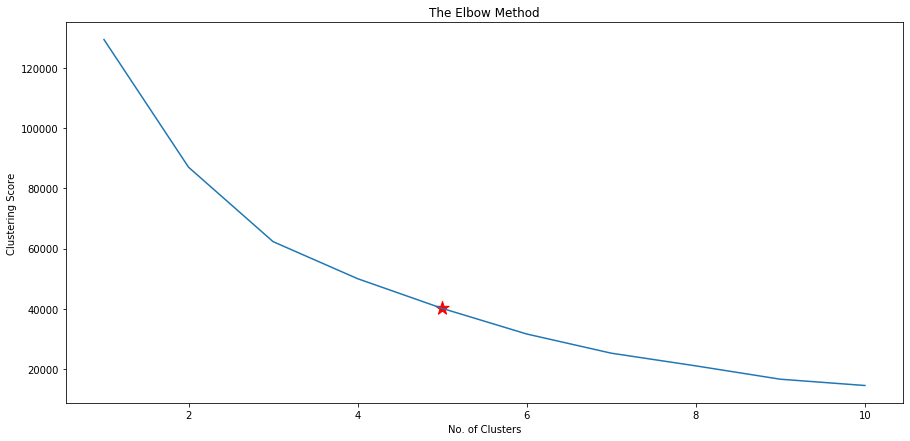

In [72]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(15,7))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [86]:
kmeans= KMeans(n_clusters = 3, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2])

In [87]:
df['cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['cluster'].value_counts())
df

Number of data points in each cluster= 
 1    42
0    30
2    27
Name: cluster, dtype: int64


,Transactions,Fruits,Meat,Veg,cluster
0,45,27,39,41,0
1,26,51,10,46,1
2,50,0,5,3,2
3,67,64,43,20,0
4,4,48,53,31,1
...,...,...,...,...,...
94,11,48,53,31,1
95,68,24,19,22,2
96,15,38,33,56,1
97,34,32,35,49,1


In [88]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

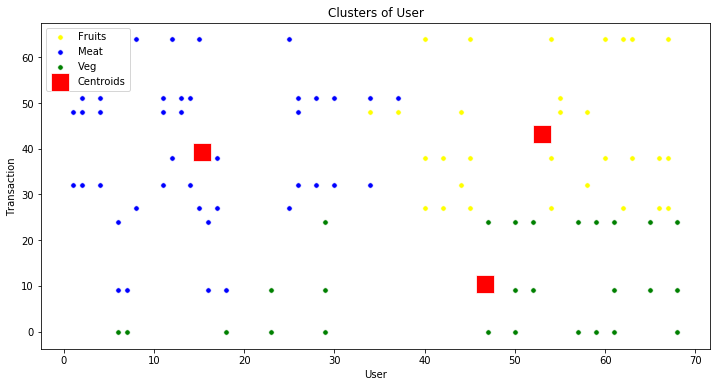

In [89]:
plt.figure(figsize=(12,6))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Fruits',s=30)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Meat',s=30)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Veg',s=30)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of User')
plt.xlabel('User')
plt.ylabel('Transaction')
plt.legend()
plt.show()

In [90]:
data = df.values[:, 0:3]
category = df.values[:, 3]

# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green', 'red']
for i in range(100):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

AttributeError: 'float' object has no attribute 'sqrt'